In [1]:
import sqlite3
import pandas as pd
import soccerdata as sd
from pathlib import PosixPath
import plotly.express as px

[03/03/24 23:13:58] INFO     Custom team name replacements loaded from                                ]8;id=197375;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=944445;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_config.py#85\85]8;;\
                             /home/morten/soccerdata/config/teamname_replacements.json.                            

                    INFO     Custom league dict loaded from                                          ]8;id=640449;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=772917;file:///home/morten/.conda/envs/packing-report/lib/python3.10/site-packages/soccerdata/_config.py#163\163]8;;\
                             /home/morten/soccerdata/config/league_dict.json.                                      

In [2]:
from database_io import DB_player

In [3]:
db_handler = DB_player("/home/morten/Develop/packing-report/Goal-Difference-Elo-GDE/GDE.db")

In [8]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("/home/morten/Develop/packing-report/Goal-Difference-Elo-GDE/GDE.db")

# Execute SQL query and load results into a DataFrame
df = pd.read_sql_query("SELECT * FROM games", conn)

In [9]:
df

,game_id,player_id,minutes,starter,opposition_team_id,result,elo,opposition_elo,game_date,team_id,expected_game_result,roundend_expected_game_result,league
0,1202134,128289,93,1,283,0-1,1475.950677,1464.388587,2017-07-28,109,0.011410,0.0,GER-Bundesliga2
1,1202134,13514,93,1,283,0-1,1475.950677,1464.388587,2017-07-28,109,0.011410,0.0,GER-Bundesliga2
2,1202134,19053,93,1,283,0-1,1475.950677,1464.388587,2017-07-28,109,0.011410,0.0,GER-Bundesliga2
3,1202134,132011,93,1,283,0-1,1475.950677,1464.388587,2017-07-28,109,0.011410,0.0,GER-Bundesliga2
4,1202134,117801,46,1,283,0-0,1475.950677,1475.950677,2017-07-28,109,-0.004379,0.0,GER-Bundesliga2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87208,1557933,261618,15,0,1143,0-0,1528.189342,1443.237088,2022-05-15,42,0.395769,0.0,GER-Bundesliga2
87209,1557933,419938,9,0,42,0-0,1433.365877,1572.634735,2022-05-15,1143,-0.438566,0.0,GER-Bundesliga2
87210,1557933,349684,9,0,42,0-0,1582.726041,1572.634735,2022-05-15,1143,-0.180001,0.0,GER-Bundesliga2
87211,1557933,379190,4,0,1143,0-0,1537.610433,1450.085305,2022-05-15,42,0.365206,0.0,GER-Bundesliga2


In [10]:
px.scatter(df.groupby("game_date").aggregate({"elo": "mean", "opposition_elo": "mean"}).reset_index(), x="game_date", y="elo")

<AxesSubplot:>

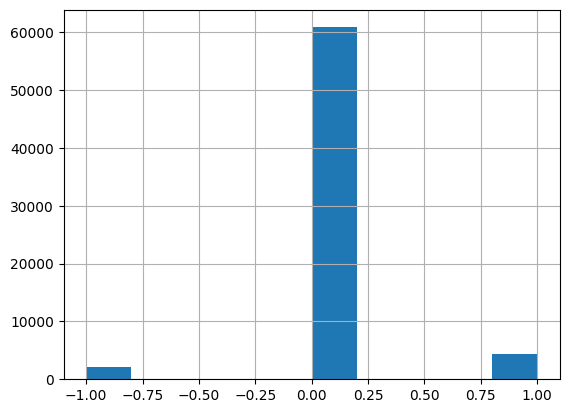

In [12]:
df[df["starter"] == 1].roundend_expected_game_result.hist()

In [13]:
df

,game_id,player_id,minutes,starter,opposition_team_id,result,elo,opposition_elo,game_date,team_id,expected_game_result,roundend_expected_game_result,league
0,1202134,128289,93,1,283,0-1,1475.950677,1464.388587,2017-07-28,109,0.011410,0.0,GER-Bundesliga2
1,1202134,13514,93,1,283,0-1,1475.950677,1464.388587,2017-07-28,109,0.011410,0.0,GER-Bundesliga2
2,1202134,19053,93,1,283,0-1,1475.950677,1464.388587,2017-07-28,109,0.011410,0.0,GER-Bundesliga2
3,1202134,132011,93,1,283,0-1,1475.950677,1464.388587,2017-07-28,109,0.011410,0.0,GER-Bundesliga2
4,1202134,117801,46,1,283,0-0,1475.950677,1475.950677,2017-07-28,109,-0.004379,0.0,GER-Bundesliga2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87208,1557933,261618,15,0,1143,0-0,1528.189342,1443.237088,2022-05-15,42,0.395769,0.0,GER-Bundesliga2
87209,1557933,419938,9,0,42,0-0,1433.365877,1572.634735,2022-05-15,1143,-0.438566,0.0,GER-Bundesliga2
87210,1557933,349684,9,0,42,0-0,1582.726041,1572.634735,2022-05-15,1143,-0.180001,0.0,GER-Bundesliga2
87211,1557933,379190,4,0,1143,0-0,1537.610433,1450.085305,2022-05-15,42,0.365206,0.0,GER-Bundesliga2


In [ ]:
df[df["starter"] == 1].roundend_expected_game_result.hist()